In [96]:
%pylab inline
from utils import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# 數論、密碼和計算
## 魏澤人 @ Hacking Thursday 2016-04-21

### 國立東華大學應用數學學系

In [97]:
html = get_html('http://en.wikipedia.org/wiki/World_Series_of_Poker')
show_html(html.find('h1'))
show_html(html.findAll('table')[2])

Year,Winner,Winning hand,First place prize,Entrants,Runner-up,Losing hand
1970,Johnny Moss,N/A,N/A,7,N/A,N/A
1971,Johnny Moss,N/A,"30,000",6,"Walter ""Puggy"" Pearson",N/A
1972,"Thomas ""Amarillo Slim"" Preston, Jr.",K♥ J♦,"80,000",8,"Walter ""Puggy"" Pearson",6 6
1973,"Walter ""Puggy"" Pearson",A♠ 7♠,"130,000",13,Johnny Moss,K♥ J♠
1974,Johnny Moss,3♥ 3♠,"160,000",16,Crandell Addington,A♣ 2♣
1975,"Brian ""Sailor"" Roberts",J♠ J♥,"210,000",21,Bob Hooks,J♣ 9♣
1976,Doyle Brunson,10♠ 2♠,"220,000",22,Jesse Alto,A♠ J♦
1977,Doyle Brunson,10♠ 2♥,"340,000",34,Gary Berland,8♥ 5♣
1978,Bobby Baldwin,Q♦ Q♣,"210,000",42,Crandell Addington,9♦ 9♣
1979,Hal Fowler,7♠ 6♦,"270,000",54,Bobby Hoff,A♣ A♥


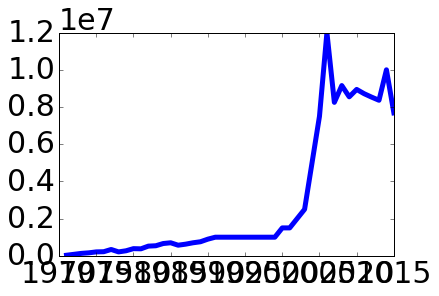

In [98]:
winners = pd.read_html(str(html.findAll('table')), header=0)[2]
plot(winners['Year'], winners['First place prize']);

# Decentralized Poker Room?

# Crepeau's requirements of mental poker

1. Absence of trusted third party

2. Uniqueness of cards

3. Uniform random distribution of cards

4. Cheating detection with very high probability

5. Complete confidentiality of cards

6. Minimal effect of coalitions

7. Complete confidentiality of strategy

# Related Concept

1. Coin Tossing

2. Voting

3. Zero-knowledge Proof

4. Partial Information Extraction

5. Multi-party Secure Computation

6. Commuting Encryption

7. Homomorphic Encryption

# Number Theory

Good book for programmer

A Computational Introduction to Number Theory and Algebra http://www.shoup.net/ntb/ntb-v2.pdf

# Easy
1. Find  $a^{-1} \mod p $
2. Solve  $ x^2 \equiv a \mod p $
3. Primarity test
4. Compute $ a^x $
5. gcd


# Difficult

1. Factorization
2. Discrete logarithm: solve $a^x \equiv b \mod p$


# Primarity test

1. $a^{p-1} \equiv 1 \mod p$
2. $x^2 \equiv 1 \mod p$ has only trivial solutions

### For example
if $n = 113 $, $ n-1 = 112 = 7\times16$


we compute and check $x^{7}$, $x^{14}$, $x^{28}$, $x^{56}$, $x^{112}$

(for some random $x$)

In [99]:
def power_of_2(k):
    p2 = 0
    while k%2 == 0:
        k = k // 2
        p2+=1
    return k, p2

In [100]:
def MillerRabbin(n):
    P = [2,3,5]
    if n in P: 
        return True
    if n%2 == 0:
        return False
    k, p2  = power_of_2(n - 1)
    
    def test_r(r):
        x = pow(r, k, n)
        if x in [1, n-1]:
            return True
        for i in range(p2-1):
            x = x**2%n
            if x == n-1: 
                return True
            if x == 1: 
                return False
        return False
    
    for r in P:
        if not test_r(r):
            return False
    return True

In [101]:
import gmpy2
for i in range(2, 10**7):
    if gmpy2.is_prime(gmpy2.mpz(i)) != MillerRabbin(i):
        print(i)

#  Diffie-Hellman key exchange

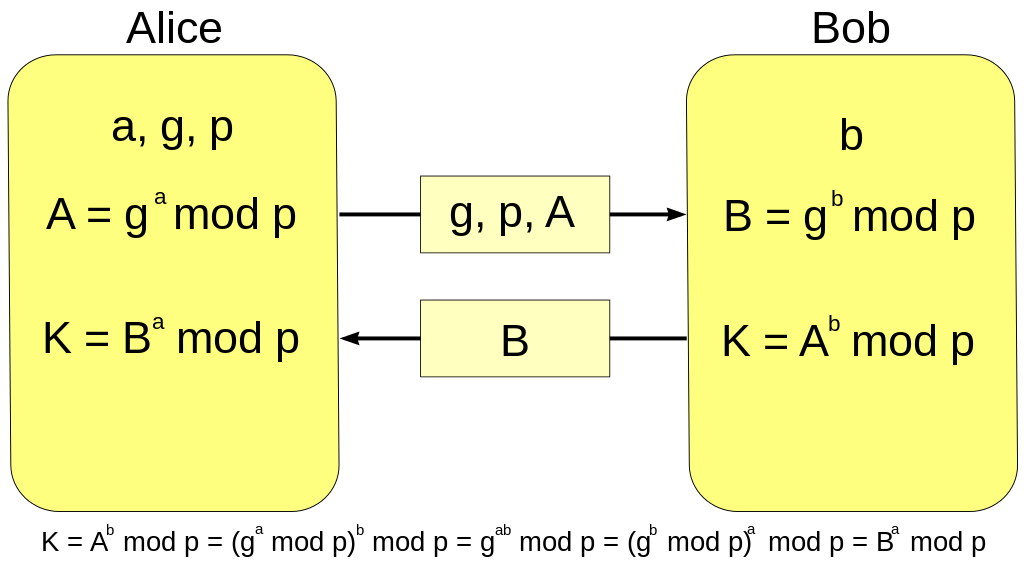

In [102]:
Image("http://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Diffie-Hellman-Schl%C3%BCsselaustausch.svg/1024px-Diffie-Hellman-Schl%C3%BCsselaustausch.svg.png" )

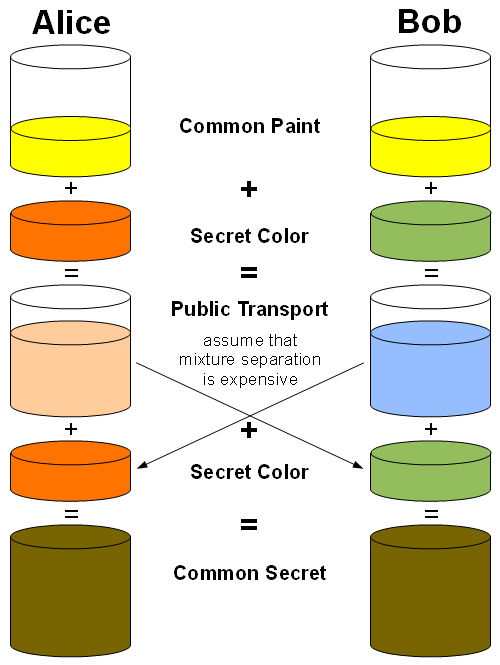

In [103]:
Image("https://upload.wikimedia.org/wikipedia/commons/a/a9/Diffie-Hellman_Key_Exchange.png")

In [104]:
from gmpy2 import next_prime, powmod, invert
from random import randint
Alice , Bob = {}, {}
p = next_prime(1000000)
g = 3
from IPython.display import Math, Latex
Latex("$p=%d$  and  $g=%d$"%(p,g))

<IPython.core.display.Latex object>

In [105]:
Alice = {"a": randint(1, p-1)}
A = eval("powmod(g,a,p)", None, Alice)
Latex("$A = g^a = %d$"%(A))

<IPython.core.display.Latex object>

In [106]:
Bob['b'] = randint(1, p-1)
B = eval("powmod(g,b,p)", None, Bob)
Latex("$B = g^b = %d$"%(B))

<IPython.core.display.Latex object>

In [107]:
eval("powmod(A,b,p)", None, Bob)

mpz(912050)

In [108]:
eval("powmod(B,a,p)", None, Alice)

mpz(912050)

## RSA

### 產生公鑰和私鑰
* 隨機選兩個大質數 $p$ 和 $q$，計算 $N=pq$
* $r=(p-1)(q-1)$ 
* 隨機選 $e < r$ ，並求得 $d$ 使得 $ ed \equiv 1 (\mod r)$


$(N, e)$ 是公鑰


$d$ 是私鑰


In [109]:
from gmpy2 import invert
def generate_keys():
    p = next_prime(randint(100000,200000))
    q = next_prime(randint(100000,200000))
    N = p*q
    r = (p-1)* (q-1)
    while True:
        e = randint(2,r-1)
        if gmpy2.gcd(e, r) == 1:
            break
    d = invert(e, r)
    return N, e, d
N, e, d = generate_keys()
print(N, e, d)

31985668007 23269113593 2612372201


### Encrypt

In [110]:
m = 12345678
c = powmod(m, e, N)
print(c)

17583095739


# Decrypt

In [111]:
powmod(c, d, N)

mpz(12345678)

# ElGamal

In [112]:
p = next_prime(1000000000) # 公鑰
g = 3              # 公鑰
x = randint(2, p-1) # 私鑰
h = powmod(g, x, p) # 公鑰

### Encrypt


$ c = (g^y, m\cdot h^y) = (g^y, m\cdot g^{xy})$ 

In [113]:
m = 31415926
y = randint(2, p-1)
c = (powmod(g, y, p), m * powmod(h, y, p))
print(c[0], c[1])

848147631 22064007984163274


### Decrypt
$m = c_1 c_0^{-x} $

In [114]:
c[1] * powmod(c[0], -x, p)  % p

mpz(31415926)

# Decisional Diffie Hellman Assumption

$ g, g^x, g^y , g^{xy} $

and

$ g, g^x, g^y , g^{z} $

are indistinguishable

Indistinguishable:

$\left|\Pr [T(X)=1] -\Pr[T(Y)=1]\right| = o(n^{-k})$

for every $k$



## 打電話丟銅板

## 電子簽章

# Oblivious transfer

A 寄給 B 幾封信件，B 打開一封（而且只能打開一封），但是 A 不知道 B 打開的是哪一封。


## Zero-knowledge proof
(ref img src)

<img src="http://upload.wikimedia.org/wikipedia/commons/d/dd/Zkip_alibaba1.png" />

<img src="http://upload.wikimedia.org/wikipedia/commons/c/cc/Zkip_alibaba2.png" />

<img src="http://upload.wikimedia.org/wikipedia/commons/a/a1/Zkip_alibaba3.png" />

<img src="http://4.bp.blogspot.com/-FbHAWAqRnZA/URvKJWezxQI/AAAAAAAAAUU/0xdjMRv7SAI/s1600/UncoloredGraph.png" />

<img src="http://2.bp.blogspot.com/-k5Nk4jNZzh0/URvKkenGPnI/AAAAAAAAAUc/jQqDWTiyVkc/s1600/ColoredGraph.png" />

<img src="http://3.bp.blogspot.com/-zdK3pSMHK9U/URvMVG3xuYI/AAAAAAAAAUk/2jJP1pKCErw/s1600/HATS.png" />

<img src="http://2.bp.blogspot.com/-YemyvccIRm8/URvMejq4oZI/AAAAAAAAAUs/onjJLeHjThU/s1600/HatsMinusOne.png" />

# Bitcoin

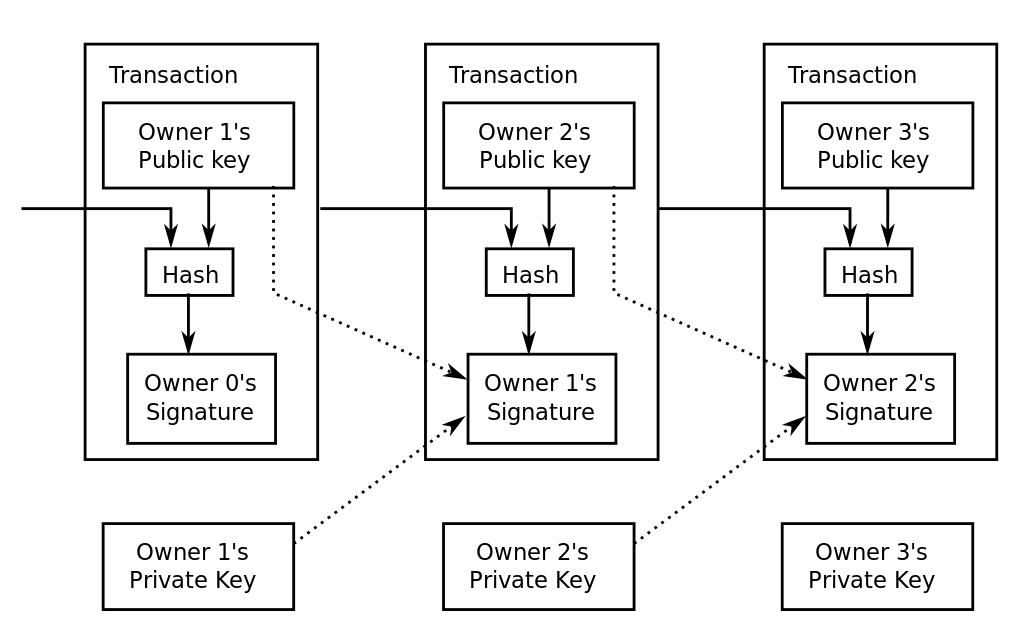

In [115]:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Bitcoin_Transaction_Visual.svg/1024px-Bitcoin_Transaction_Visual.svg.png")